# 2020

In [1]:
%load_ext watermark
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO, WeekdayLocator
from IPython.display import Markdown as md
import datetime as dt

In [2]:
# filter variables
year = ["2020"]
categories = ["Bioindicator", "Coliform", "Other"]
label_colors = {"Bioindicator":"dodgerblue", "Coliform":"magenta"}
locations = ["SVT", "VNX", "MRD"]
date_range = ["2020-07-03", "2020-07-18"]
date_range_dt = (dt.date(2020, 7, 3), dt.date(2020, 7, 18))


y = "per/100ml"

new_sd = pd.read_csv("data/end/2016_2023_MRD_VNX_SVT.csv")
new_rd = pd.read_csv("data/end/rain_data_2020.csv")

date_format = mdates.DateFormatter('%m-%d')

# data formatting
from yearly_summaries import report_data, rain_data_format, location_summary, format_df_for_display_mean_std

# charts
from yearly_summaries import scatter_plot_with_std, scatterplot_date_label, scatterplot_date_label_rain, location_summary_charts
from yearly_summaries import major_and_minor_ticks, boxplots_before_during_after

rep_data = report_data(new_sd, y=y, locations=locations, categories=categories, years=year)
rain_data = rain_data_format(new_rd, rep_data["date"].min(), rep_data["date"].max())

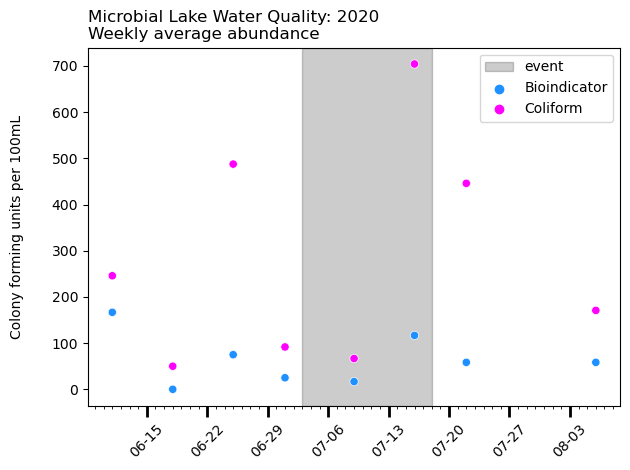

In [3]:
# mean per sample day and location
# set the index groups
groups = ["date", "label"]
figure_name = "mean_plate_count_no_rain"
title = "Weekly average abundance"
project = f"Microbial Lake Water Quality: {year[0]}"

scatterplot_date_label(rep_data, y,  groups, title, project, date_range_dt, date_format, label_colors, year, figure_name)

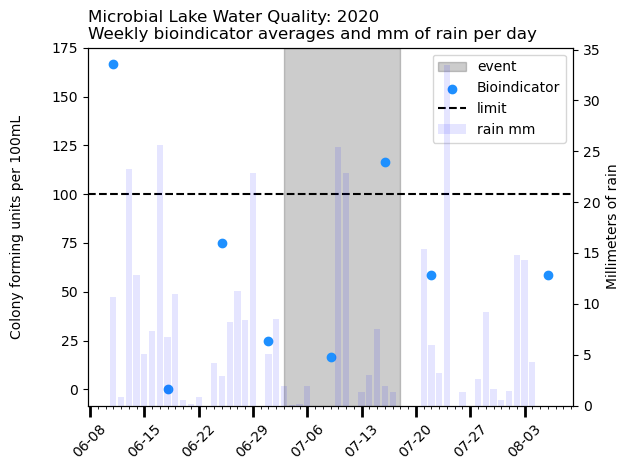

In [4]:
mean_sample_day_location_category = rep_data[rep_data.label == "Bioindicator"].groupby(groups, as_index=False)[y].mean()
figure_name = "mean_plate_count_bioindicator_rain"

title = "Weekly bioindicator averages and mm of rain per day"

scatterplot_date_label_rain(rep_data, rain_data, y, date_range_dt, date_format,  groups, "Bioindicator", title, project, label_colors, year, figure_name)

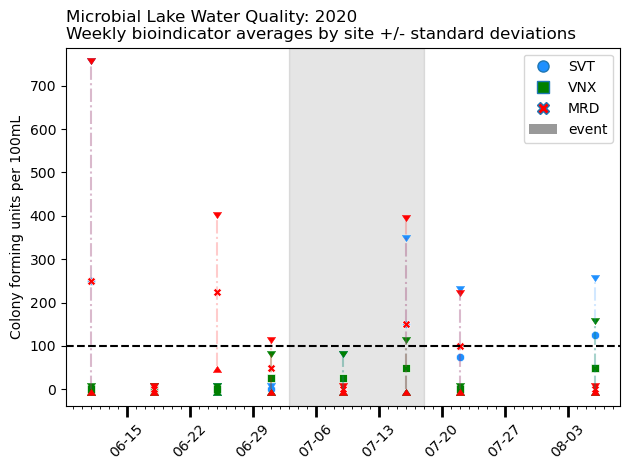

In [5]:
# bioindicator results
title = "Weekly bioindicator averages by site +/- standard deviations"
figure_name3 = f"location_summary_bio_indicators_{year[0]}"
file_name = f"resources/charts/figure_three_{year[0]}.jpg"

by_location = location_summary(rep_data, y)

location_summary_charts(by_location, date_range_dt, date_format, locations, project, title, figure_name3, file_name)

## Are the weekly bioindicator averages during the event greater than before or after the event?

__Note:__ No event was held due to the pandemic lockdown of 2020. Presumptive time periods are retained for analysis.

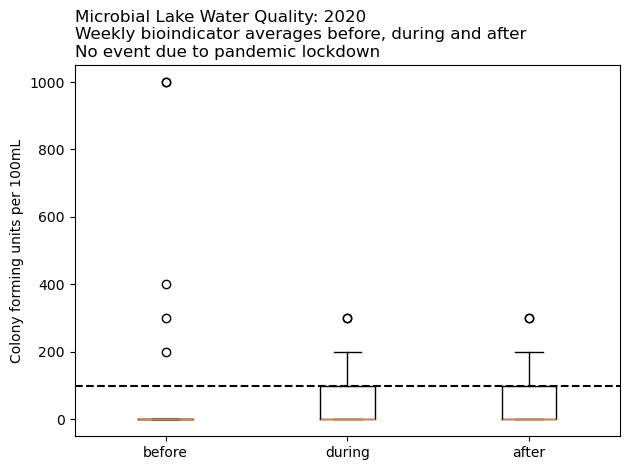

In [9]:
data = rep_data[rep_data.label == "Bioindicator"]

before = data[data["before event"] == True][y].values
during = data[data["event"] == True][y].values
after = data[data["after event"] == True ][y].values

d = [before, during, after]

title = "Weekly bioindicator averages before, during and after \nNo event due to pandemic lockdown"
figure_name4 = f"before_during_after_{year[0]}"
file_name = f"resources/charts/figure_four_{year[0]}.jpg"


boxplots_before_during_after(d, project, title, figure_name4, file_name)

In [7]:
today = dt.datetime.now().date().strftime("%d/%m/%Y")
where = "Ecublens, CH"

my_block = f"""

This script updated {today} in {where}

\u2764\ufe0f __what you do everyday:__ *biolab at hackuarium*
"""

md(my_block)



This script updated 30/01/2024 in Ecublens, CH

❤️ __what you do everyday:__ *biolab at hackuarium*


In [8]:
%watermark --iversions -b -r

Git repo: https://github.com/rachelaronoff/qualite-deau.git

Git branch: main

numpy     : 1.26.3
pandas    : 2.1.4
seaborn   : 0.12.2
matplotlib: 3.8.0

